Task 1: Edge Detection


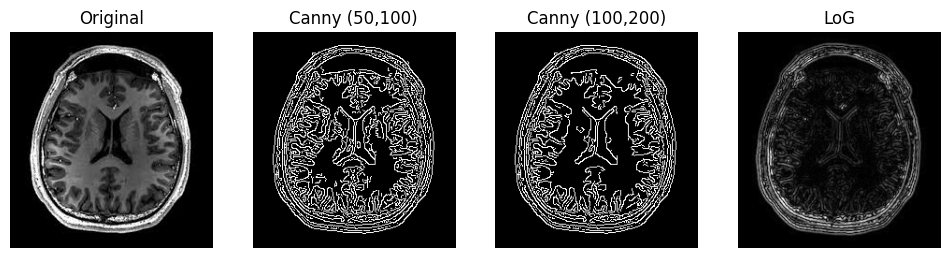

Task 2: Harris Corner Detection


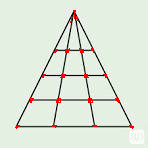

Task 3a: Hough Line Transform


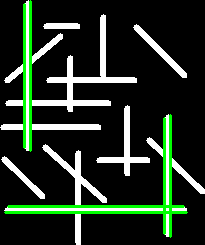

Task 3b: Hough Circle Transform


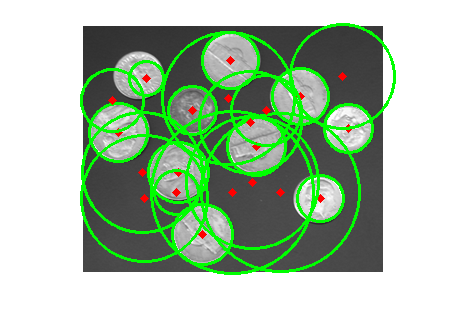

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Task 1: Edge Detection")
medical_image = cv2.imread('/content/medical2.jpeg', cv2.IMREAD_GRAYSCALE)

canny_edges_50 = cv2.Canny(medical_image, 50, 100)
canny_edges_100 = cv2.Canny(medical_image, 100, 200)

blurred_image = cv2.GaussianBlur(medical_image, (5, 5), 0)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)
log_edges = np.uint8(np.absolute(log_edges))

fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(medical_image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(canny_edges_50, cmap='gray')
axes[1].set_title('Canny (50,100)')
axes[2].imshow(canny_edges_100, cmap='gray')
axes[2].set_title('Canny (100,200)')
axes[3].imshow(log_edges, cmap='gray')
axes[3].set_title('LoG')
for ax in axes:
    ax.axis('off')
plt.show()

print("Task 2: Harris Corner Detection")
corner_image = cv2.imread('/content/corner.jpeg')
gray_corner = cv2.cvtColor(corner_image, cv2.COLOR_BGR2GRAY)

gray_corner = np.float32(gray_corner)
corners = cv2.cornerHarris(gray_corner, 2, 3, 0.04)
corner_image[corners > 0.01 * corners.max()] = [0, 0, 255]  # Mark corners in red

cv2_imshow(corner_image)

print("Task 3a: Hough Line Transform")
line_image = cv2.imread('/content/Line Detection.png')
gray_line = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_line, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(line_image)

print("Task 3b: Hough Circle Transform")
circle_image = cv2.imread('/content/DetectEdgesInImages.png')
gray_circle = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray_circle, (9, 9), 2)

circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

cv2_imshow(circle_image)
